In [2]:
import pandas as pd
import pickle

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import chi2_contingency
import scipy.stats as stats
from math import log10, log2

def ICD10_code_to_chapter(let):
    if let == 'nan':
        return 'NaN';
    elif let[0] == 'A' or let[0] == 'B':
        return 'A00–B99';
    elif let[0] == 'C' or (let[0] == 'D' and int(let[1])>=0 and int(let[1])<5):
        return 'C00–D48';
    elif let[0] == 'D' and int(let[1])>=5 and int(let[1])<9:
        return 'D50–D89';
    elif let[0] == 'E':
        return 'E00–E90';
    elif let[0] == 'H' and int(let[1])>=0 and int(let[1])<6:
        return 'H00–H59';
    elif let[0] == 'H' and int(let[1])>=6 and int(let[1])<=9:
        return 'H60–H95';
    elif let[0] == 'K':
        return 'K00–K93';
    elif let[0] == 'P':
        return 'P00–P96';
    elif let[0] == 'S' or let[0] == 'T':
        return 'S00–T98';
    elif let[0] in ['V','W','X','Y']:
        return 'V01–Y98';
    elif let[0] in ['F', 'G','I', 'J', 'L', 'M', 'N', 'O','Q','R','Z','U']:
        return '{}00–{}99'.format(let[0], let[0]);
    else:
        return let;
    
def ICDchapter_to_name(chp):
    if chp == 'nan': return 'NaN';
    elif chp == 'A00–B99': return 'Certain infectious and parasitic diseases';
    elif chp == 'C00–D48': return 'Neoplasms';
    elif chp == 'D50–D89': return 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism';
    elif chp == 'E00–E90': return 'Endocrine, nutritional and metabolic diseases';
    elif chp == 'F00–F99': return 'Mental and behavioural disorders';
    elif chp == 'G00–G99': return 'Diseases of the nervous system';
    elif chp == 'H00–H59': return 'Diseases of the eye and adnexa';
    elif chp == 'H60–H95': return 'Diseases of the ear and mastoid process';
    elif chp == 'I00–I99': return 'Diseases of the circulatory system';
    elif chp == 'J00–J99': return 'Diseases of the respiratory system';
    elif chp == 'K00–K93': return 'Diseases of the digestive system';
    elif chp == 'L00–L99': return 'Diseases of the skin and subcutaneous tissue';
    elif chp == 'M00–M99': return 'Diseases of the musculoskeletal system and connective tissue';
    elif chp == 'N00–N99': return 'Diseases of the genitourinary system';
    elif chp == 'O00–O99': return 'Pregnancy, childbirth and the puerperium';
    elif chp == 'P00–P96': return 'Certain conditions originating in the perinatal period';
    elif chp == 'Q00–Q99': return 'Congenital malformations, deformations and chromosomal abnormalities';
    elif chp == 'R00–R99': return 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified';
    elif chp == 'S00–T98': return 'Injury, poisoning and certain other consequences of external causes';
    elif chp == 'V01–Y98': return 'External causes of morbidity and mortality';
    elif chp == 'Z00–Z99': return 'Factors influencing health status and contact with health services';
    elif chp == 'U00–U99': return 'Codes for special purposes';
    else: return ' ';

In [4]:
# ファイル名とデータを格納する辞書を用意
data_dict_f = {}

# c0からc4までのファイルをループで読み込み、Cluster列を追加
for i in range(5):
    file_name = f'all_diagnosis_stats_c{i}_other_AD_female.pickle'
    with open(file_name, 'rb') as file:
        data = pickle.load(file)
        df = pd.DataFrame(data['ICD10'])  # データをデータフレームに変換
        df['Cluster'] = i  # Cluster列を追加して値を設定
        data_dict_f[f'c{i}'] = df  # 辞書に保存

In [5]:
# 辞書内のデータフレームをすべて縦に結合
combined_df_f = pd.concat(data_dict_f.values(), ignore_index=False)

In [6]:
combined_df_f.columns

Index(['chistat', 'pvalue', 'dof', 'expected', 'Count_c0', 'Count_r_c0',
       'Count_nonc0', 'Count_r_nonc0', '-log_pvalue', 'OddsRatio', 'fpvalue',
       'log2_oddsratio', '-log_fpvalue', 'ICD10_chape', 'sig', 'Cluster',
       'Count_c1', 'Count_r_c1', 'Count_nonc1', 'Count_r_nonc1', 'Count_c2',
       'Count_r_c2', 'Count_nonc2', 'Count_r_nonc2', 'Count_c3', 'Count_r_c3',
       'Count_nonc3', 'Count_r_nonc3', 'Count_c4', 'Count_r_c4', 'Count_nonc4',
       'Count_r_nonc4'],
      dtype='object')

In [7]:
df_f = combined_df_f[['-log_pvalue','pvalue','OddsRatio','Cluster']]

In [8]:
# ファイル名とデータを格納する辞書を用意
data_dict_m = {}

# c0からc4までのファイルをループで読み込み、Cluster列を追加
for i in range(5):
    file_name = f'all_diagnosis_stats_c{i}_other_AD_male.pickle'
    with open(file_name, 'rb') as file:
        data = pickle.load(file)
        df = pd.DataFrame(data['ICD10'])  # データをデータフレームに変換
        df['Cluster'] = i  # Cluster列を追加して値を設定
        data_dict_m[f'c{i}'] = df  # 辞書に保存

In [9]:
# 辞書内のデータフレームをすべて縦に結合
combined_df_m = pd.concat(data_dict_m.values(), ignore_index=False)

In [10]:
combined_df_m.columns

Index(['chistat', 'pvalue', 'dof', 'expected', 'Count_c0', 'Count_r_c0',
       'Count_nonc0', 'Count_r_nonc0', '-log_pvalue', 'OddsRatio', 'fpvalue',
       'log2_oddsratio', '-log_fpvalue', 'ICD10_chape', 'sig', 'Cluster',
       'Count_c1', 'Count_r_c1', 'Count_nonc1', 'Count_r_nonc1', 'Count_c2',
       'Count_r_c2', 'Count_nonc2', 'Count_r_nonc2', 'Count_c3', 'Count_r_c3',
       'Count_nonc3', 'Count_r_nonc3', 'Count_c4', 'Count_r_c4', 'Count_nonc4',
       'Count_r_nonc4'],
      dtype='object')

In [11]:
df_m = combined_df_m[['-log_pvalue','pvalue','OddsRatio','Cluster']]

In [12]:
df_m = df_m.reset_index()
df_f = df_f.reset_index()

In [13]:
df_m.rename(columns={'-log_pvalue': '-log_pvalue_m', 'pvalue': 'pvalue_m', 'OddsRatio': 'OddsRatio_m'}, inplace=True)
df_f.rename(columns={'-log_pvalue': '-log_pvalue_f', 'pvalue': 'pvalue_f', 'OddsRatio': 'OddsRatio_f'}, inplace=True)

In [14]:
data = pd.merge(df_m, df_f, on=['ICD10', 'Cluster'], how='outer')

In [15]:
df_f

,ICD10,-log_pvalue_f,pvalue_f,OddsRatio_f,Cluster
0,I10,277.312485,4.869843e-278,0.094754,0
1,F02.80,6.957634,1.102469e-07,0.733685,0
2,F03.90,155.743863,1.803587e-156,0.210379,0
3,R41.3,45.820236,1.512741e-46,0.406180,0
4,E78.5,174.033122,9.265691e-175,0.174226,0
...,...,...,...,...,...
44665,A60.9,-0.000000,1.000000e+00,0.000000,4
44666,H44.439,-0.000000,1.000000e+00,0.000000,4
44667,Z60.8,-0.000000,1.000000e+00,0.000000,4
44668,M66.232,-0.000000,1.000000e+00,0.000000,4


In [16]:
data

,ICD10,-log_pvalue_m,pvalue_m,OddsRatio_m,Cluster,-log_pvalue_f,pvalue_f,OddsRatio_f
0,I10,163.477848,3.327761e-164,0.076819,0,277.312485,4.869843e-278,0.094754
1,F02.80,13.275927,5.297519e-14,0.554046,0,6.957634,1.102469e-07,0.733685
2,F03.90,81.769376,1.700687e-82,0.214487,0,155.743863,1.803587e-156,0.210379
3,R41.3,21.961599,1.092449e-22,0.439156,0,45.820236,1.512741e-46,0.406180
4,E78.5,131.004384,9.899564e-132,0.133443,0,174.033122,9.265691e-175,0.174226
...,...,...,...,...,...,...,...,...
51770,M84.469A,NaN,NaN,NaN,4,-0.000000,1.000000e+00,0.000000
51771,I83.028,NaN,NaN,NaN,4,-0.000000,1.000000e+00,0.000000
51772,H44.439,NaN,NaN,NaN,4,-0.000000,1.000000e+00,0.000000
51773,Z60.8,NaN,NaN,NaN,4,-0.000000,1.000000e+00,0.000000


In [17]:
data = data.reset_index()

In [18]:
data['ICD10_chape'] = data['ICD10'].apply(lambda x: ICD10_code_to_chapter(str(x)[0:3])) # Get ICD10 Chapte

In [19]:
data['ICD10_chape_name'] = data['ICD10_chape'].apply(lambda x: ICDchapter_to_name(x))

In [20]:
data

,index,ICD10,-log_pvalue_m,pvalue_m,OddsRatio_m,Cluster,-log_pvalue_f,pvalue_f,OddsRatio_f,ICD10_chape,ICD10_chape_name
0,0,I10,163.477848,3.327761e-164,0.076819,0,277.312485,4.869843e-278,0.094754,I00–I99,Diseases of the circulatory system
1,1,F02.80,13.275927,5.297519e-14,0.554046,0,6.957634,1.102469e-07,0.733685,F00–F99,Mental and behavioural disorders
2,2,F03.90,81.769376,1.700687e-82,0.214487,0,155.743863,1.803587e-156,0.210379,F00–F99,Mental and behavioural disorders
3,3,R41.3,21.961599,1.092449e-22,0.439156,0,45.820236,1.512741e-46,0.406180,R00–R99,"Symptoms, signs and abnormal clinical and labo..."
4,4,E78.5,131.004384,9.899564e-132,0.133443,0,174.033122,9.265691e-175,0.174226,E00–E90,"Endocrine, nutritional and metabolic diseases"
...,...,...,...,...,...,...,...,...,...,...,...
51770,51770,M84.469A,NaN,NaN,NaN,4,-0.000000,1.000000e+00,0.000000,M00–M99,Diseases of the musculoskeletal system and con...
51771,51771,I83.028,NaN,NaN,NaN,4,-0.000000,1.000000e+00,0.000000,I00–I99,Diseases of the circulatory system
51772,51772,H44.439,NaN,NaN,NaN,4,-0.000000,1.000000e+00,0.000000,H00–H59,Diseases of the eye and adnexa
51773,51773,Z60.8,NaN,NaN,NaN,4,-0.000000,1.000000e+00,0.000000,Z00–Z99,Factors influencing health status and contact ...


In [21]:
# 'IMO' を含むレコードを削除
data = data[~data['ICD10'].str.contains('IMO', na=False)]

In [22]:
# ICD-10コード順に並べ替え
data = data.sort_values(by='ICD10_chape')

# Cluster 0

In [23]:
cluster = data[data['Cluster']==0]

In [25]:
cluster['-log_pvalue_f'].nlargest(3)

23    301.691673
38    301.691673
62    301.691673
Name: -log_pvalue_f, dtype: float64

In [26]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
import seaborn as sns

In [28]:
# カラー設定
rand_colors = ['#a7414a', '#282726', '#6a8a82', '#a37c27', '#563838', '#0584f2', '#f28a30', '#f05837',
               '#6465a5', '#00743f', '#be9063', '#de8cf0', '#888c46', '#c0334d', '#270101', '#8d2f23',
               '#ee6c81', '#65734b', '#14325c', '#704307', '#b5b3be', '#f67280', '#ffd082', '#ffd800',
               '#ad62aa', '#21bf73', '#a0855b', '#5edfff', '#08ffc8', '#ca3e47', '#c9753d', '#6c5ce7']

In [96]:
'''
def miami(df="dataframe", chromo=None, logp1=None, logp2=None, color=None, dim=(10,10), r=300, ar=90, gwas_sign_line=False,
             gwasp=5E-08, dotsize=8, markeridcol=None, markernames=None, gfont=8, valpha=1, show=False, figtype='png',
             axxlabel=None, axylabel=None, axlabelfontsize=9, axlabelfontname="Arial", axtickfontsize=9, figtitle = 'miami plot',
             label1='firstgroup', label2 = 'secondgroup', rand_colors = None,
             axtickfontname="Arial", ylm=None, gstyle=1, yskip = 1, plotlabelrotation = 0, figname='miami', invert = False, fig = None, ax = None):

        _x, _y = 'Chromosomes', r'$ -log_{10}(P)$'

        df['tpval'] = df[logp1]
        df['tpval2'] = -df[logp2]
        df = df.sort_values(chromo)

        df['ind'] = range(len(df))
        df_group = df.groupby(chromo)

        if rand_colors is None:
            rand_colors = ('#a7414a', '#282726', '#6a8a82', '#a37c27', '#563838', '#0584f2', '#f28a30', '#f05837',
                               '#6465a5', '#00743f', '#be9063', '#de8cf0', '#888c46', '#c0334d', '#270101', '#8d2f23',
                               '#ee6c81', '#65734b', '#14325c', '#704307', '#b5b3be', '#f67280', '#ffd082', '#ffd800',
                               '#ad62aa', '#21bf73', '#a0855b', '#5edfff', '#08ffc8', '#ca3e47', '#c9753d', '#6c5ce7')
        #color_list = sample(rand_colors, df[chromo].nunique())
        color_list = rand_colors[:df[chromo].nunique()]

        xlabels = []
        xticks = []
        
        if fig is None:
            fig, (ax0, ax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,20]}, figsize = dim)
            ax0.axis('off')
            fig.tight_layout()

        i = 0
        for label, df1 in df.groupby(chromo):
            df1.plot(kind='scatter', x='ind', y='tpval', color=color_list[i], s=dotsize, alpha=valpha, ax=ax)
            df1.plot(kind='scatter', x='ind', y='tpval2', color=color_list[i], s=dotsize, alpha=valpha, ax=ax)
            df1_max_ind = df1['ind'].iloc[-1]
            df1_min_ind = df1['ind'].iloc[0]
            xlabels.append(label)
            xticks.append((df1_max_ind - (df1_max_ind - df1_min_ind) / 2))
            i += 1

        ax.axhline(y=0, color='#7d7d7d', linewidth=.5, zorder = 0)

        # add GWAS significant line
        if gwas_sign_line is True:
            ax.axhline(y=np.log10(gwasp), linestyle='--', color='#7d7d7d', linewidth=1)
            ax.axhline(y=-np.log10(gwasp), linestyle='--', color='#7d7d7d', linewidth=1)

        ax.margins(x=0)
        ax.margins(y=0)
        ax.set_xticks(xticks);
        (ymin, ymax) = (min(df['tpval2']-1)-10, max(df['tpval']+1)+10)
        ax.set_ylim([ymin, ymax])
        ax0.set_ylim([ymin, ymax])
        
        ax0.text(0,ymin/2,label2, fontsize=axlabelfontsize, fontname=axlabelfontname, rotation = 90, va = 'center')
        ax0.text(0,ymax/2,label1, fontsize=axlabelfontsize, fontname=axlabelfontname, rotation = 90, va = 'center')
        
        if ylm:
            ylm = np.arange(ylm[0], ylm[1], ylm[2])
        else:
            ylm = np.concatenate((np.arange(0,min(df['tpval2']-10),-yskip), np.arange(0, max(df['tpval']+10), yskip)))
            ax.set_yticks(ylm);
        ax.set_xticklabels(xlabels, rotation=ar)
        ax.set_yticklabels(ylm.astype(int), fontsize=axtickfontsize, fontname=axtickfontname);
        if axxlabel:
            _x = axxlabel
        if axylabel:
            _y = axylabel
        ax.set_xlabel(_x, fontsize=axlabelfontsize, fontname=axlabelfontname)
        ax.get_yaxis().get_label().set_visible(False)
        
        ax0.text(.5,0,_y, fontsize=axlabelfontsize, fontname=axlabelfontname, rotation = 90, va = 'center')
        
        plt.title(figtitle)
        return fig, ax
'''

'\ndef miami(df="dataframe", chromo=None, logp1=None, logp2=None, color=None, dim=(10,10), r=300, ar=90, gwas_sign_line=False,\n             gwasp=5E-08, dotsize=8, markeridcol=None, markernames=None, gfont=8, valpha=1, show=False, figtype=\'png\',\n             axxlabel=None, axylabel=None, axlabelfontsize=9, axlabelfontname="Arial", axtickfontsize=9, figtitle = \'miami plot\',\n             label1=\'firstgroup\', label2 = \'secondgroup\', rand_colors = None,\n             axtickfontname="Arial", ylm=None, gstyle=1, yskip = 1, plotlabelrotation = 0, figname=\'miami\', invert = False, fig = None, ax = None):\n\n        _x, _y = \'Chromosomes\', r\'$ -log_{10}(P)$\'\n\n        df[\'tpval\'] = df[logp1]\n        df[\'tpval2\'] = -df[logp2]\n        df = df.sort_values(chromo)\n\n        df[\'ind\'] = range(len(df))\n        df_group = df.groupby(chromo)\n\n        if rand_colors is None:\n            rand_colors = (\'#a7414a\', \'#282726\', \'#6a8a82\', \'#a37c27\', \'#563838\', \'#0584f

In [29]:
def miami(df="dataframe", chromo=None, logp1=None, logp2=None, color=None, dim=(10,10), r=300, ar=90, gwas_sign_line=False,
             gwasp=5E-08, dotsize=8, markeridcol=None, markernames=None, gfont=8, valpha=1, show=False, figtype='png',
             axxlabel=None, axylabel=None, axlabelfontsize=9, axlabelfontname="Arial", axtickfontsize=9, figtitle = 'miami plot',
             label1='firstgroup', label2 = 'secondgroup', rand_colors = None,
             axtickfontname="Arial", ylm=None, gstyle=1, yskip = 1, plotlabelrotation = 0, figname='miami', invert = False, fig = None, ax = None):

        _x, _y = 'Chromosomes', r'$ -log_{10}(P)$'

        df['tpval'] = df[logp1]
        df['tpval2'] = -df[logp2]
        df = df.sort_values(chromo)

        df['ind'] = range(len(df))
        df_group = df.groupby(chromo)

        if rand_colors is None:
            rand_colors = ('#a7414a', '#282726', '#6a8a82', '#a37c27', '#563838', '#0584f2', '#f28a30', '#f05837',
                               '#6465a5', '#00743f', '#be9063', '#de8cf0', '#888c46', '#c0334d', '#270101', '#8d2f23',
                               '#ee6c81', '#65734b', '#14325c', '#704307', '#b5b3be', '#f67280', '#ffd082', '#ffd800',
                               '#ad62aa', '#21bf73', '#a0855b', '#5edfff', '#08ffc8', '#ca3e47', '#c9753d', '#6c5ce7')
        color_list = rand_colors[:df[chromo].nunique()]

        xlabels = []
        xticks = []
        
        if fig is None:
            fig, (ax0, ax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,20]}, figsize = dim)
            ax0.axis('off')
            fig.tight_layout()

        i = 0
        for label, df1 in df.groupby(chromo):
            df1.plot(kind='scatter', x='ind', y='tpval', color=color_list[i], s=dotsize, alpha=valpha, ax=ax)
            df1.plot(kind='scatter', x='ind', y='tpval2', color=color_list[i], s=dotsize, alpha=valpha, ax=ax)
            df1_max_ind = df1['ind'].iloc[-1]
            df1_min_ind = df1['ind'].iloc[0]
            xlabels.append(label)
            xticks.append((df1_max_ind - (df1_max_ind - df1_min_ind) / 2))
            i += 1

        ax.axhline(y=0, color='#7d7d7d', linewidth=.5, zorder = 0)

        # GWAS有意線を追加
        if gwas_sign_line:
            ax.axhline(y=np.log10(gwasp), linestyle='--', color='#7d7d7d', linewidth=1)
            ax.axhline(y=-np.log10(gwasp), linestyle='--', color='#7d7d7d', linewidth=1)

        ax.margins(x=0)
        ax.margins(y=0)
        ax.set_xticks(xticks)

        # NaNを無視してy軸の範囲を計算
        ymin = np.nanmin(df['tpval2']) - 10
        ymax = np.nanmax(df['tpval']) + 10

        # y軸目盛り設定
        if ylm is not None:
            ylm = np.arange(ylm[0], ylm[1], ylm[2])
        else:
            ylm = np.concatenate((np.arange(0, ymin, -yskip), np.arange(0, ymax, yskip)))

        ax.set_ylim([ymin, ymax])
        ax0.set_ylim([ymin, ymax])
        ax.set_yticks(ylm)
        
        ax0.text(0, ymin/2, label2, fontsize=axlabelfontsize, fontname=axlabelfontname, rotation=90, va='center')
        ax0.text(0, ymax/2, label1, fontsize=axlabelfontsize, fontname=axlabelfontname, rotation=90, va='center')
        
        ax.set_xticklabels(xlabels, rotation=ar)
        ax.set_yticklabels(ylm.astype(int), fontsize=axtickfontsize, fontname=axtickfontname)
        
        if axxlabel:
            _x = axxlabel
        if axylabel:
            _y = axylabel
        ax.set_xlabel(_x, fontsize=axlabelfontsize, fontname=axlabelfontname)
        ax.get_yaxis().get_label().set_visible(False)
        
        ax0.text(.5, 0, _y, fontsize=axlabelfontsize, fontname=axlabelfontname, rotation=90, va='center')
        
        plt.title(figtitle)
        return fig, ax

In [30]:
# Miami plots
dims = (10,5)
save = False
bc = .05/cluster.shape[0]
fig, ax = miami(df = cluster.explode('ICD10_chape'), logp1 = '-log_pvalue_f', 
                    logp2 = '-log_pvalue_m', chromo = 'ICD10_chape', 
                    dim = dims, yskip =50, gwas_sign_line=True, markernames=False, 
                    markeridcol='index', plotlabelrotation = 60, show = not save,
                    axlabelfontsize = 12, gfont = 6, dotsize = 10, axtickfontsize = 10, 
                    label1 = 'Females', label2 = 'Males', gwasp=bc, 
                    figtitle = "Sex-Stratified Analysis in Cluster 0: Miami Plot")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


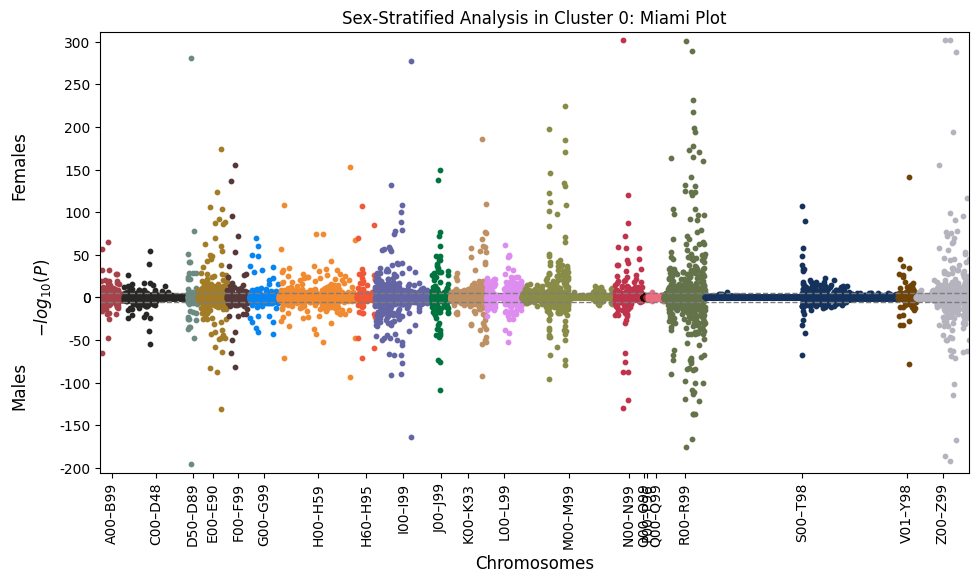

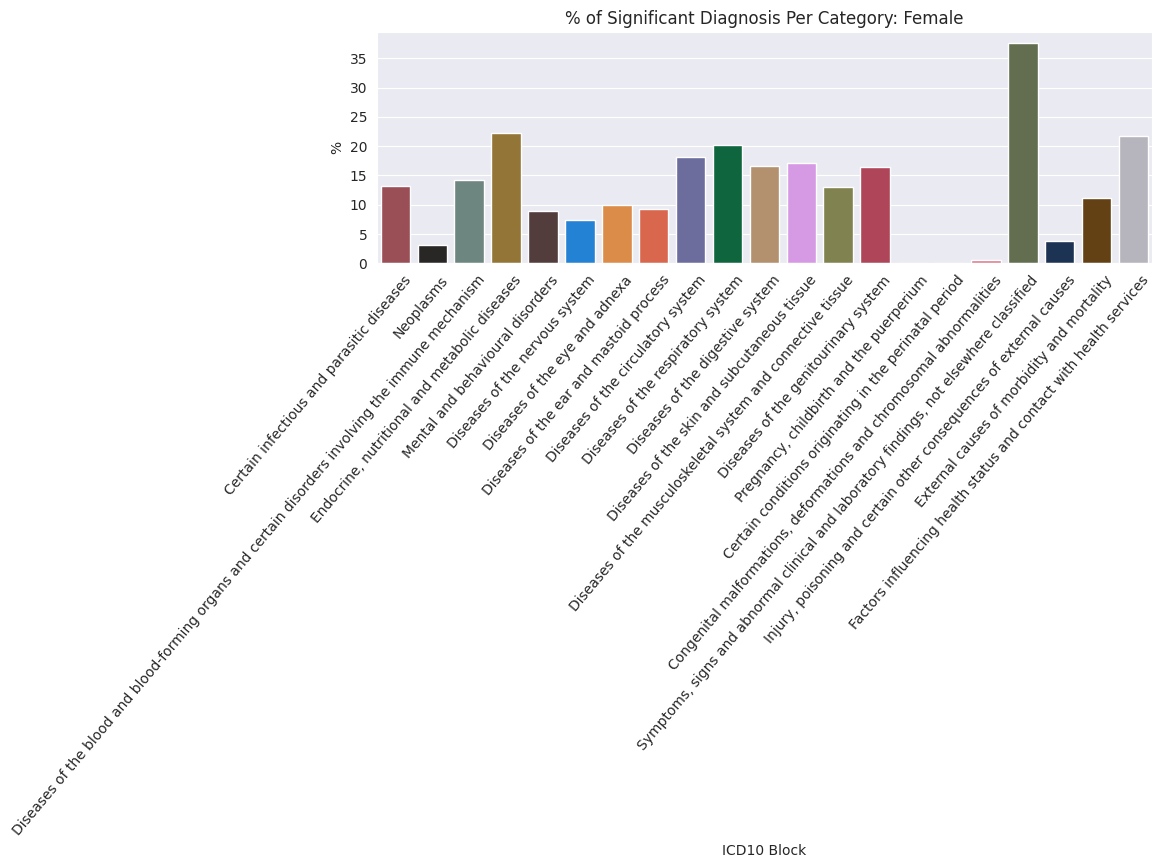

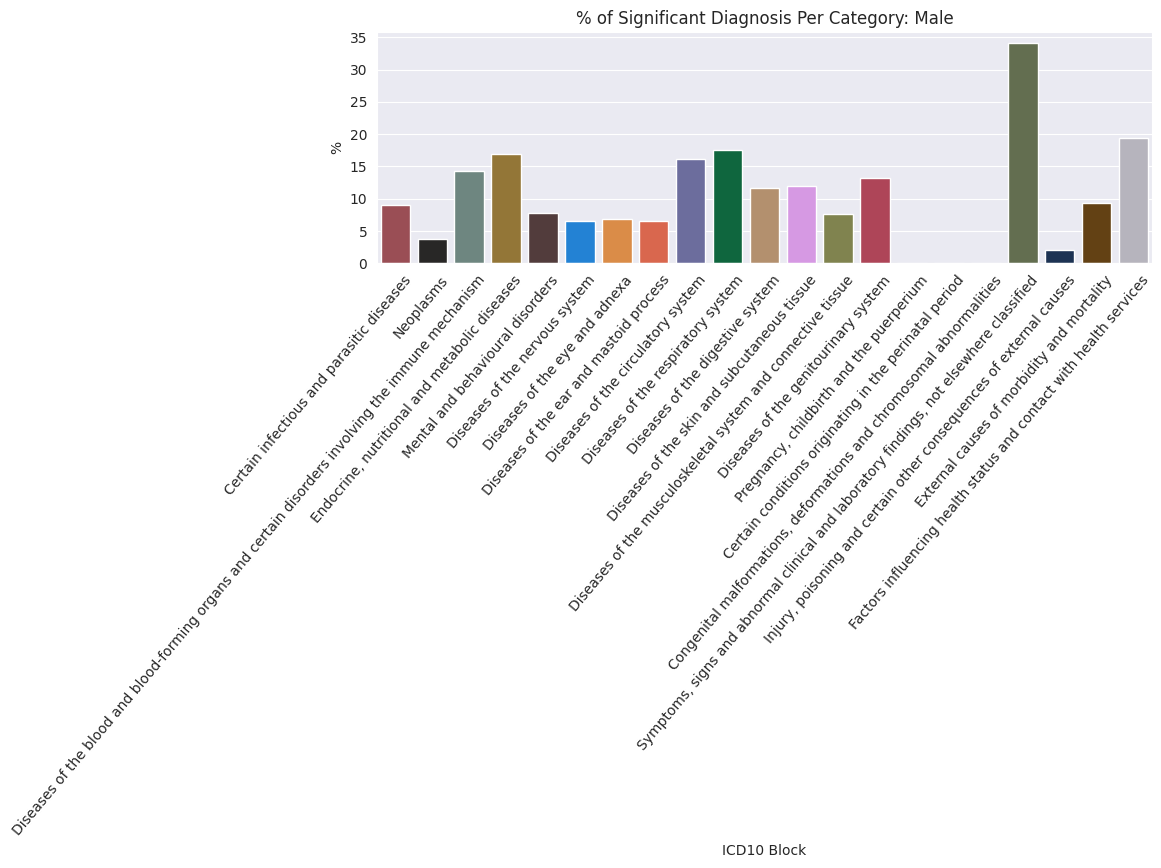

In [31]:
# percent significant in a category
icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

# ボンフェローニ補正閾値の設定
bc = .05 / cluster.shape[0]
chitest = cluster.explode('ICD10_chape').copy()
chitest['ICD10_chape'] = chitest['ICD10_chape'].apply(ICDchapter_to_name)

icd10dictF = list()
icd10dictM = list()

# 女性と男性のカテゴリごとの有意割合の計算
for value, g in chitest.groupby('ICD10_chape'):
    icd10dictF.append([value, ((g['pvalue_f'] < bc).sum()) * 100 / g.shape[0]])
    icd10dictM.append([value, ((g['pvalue_m'] < bc).sum()) * 100 / g.shape[0]])

# 女性の結果をプロット
icd10sigF = pd.DataFrame(icd10dictF).set_index(0)
icd10sigF = icd10sigF.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigF.index, y=icd10sigF[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Female')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)

# 男性の結果をプロット
icd10sigM = pd.DataFrame(icd10dictM).set_index(0)
icd10sigM = icd10sigM.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigM.index, y=icd10sigM[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Male')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)
    plt.show()

In [39]:
# 上位10件の行を取得
top_10_df_f = cluster.nlargest(10, '-log_pvalue_f')
top_10_df_m = cluster.nlargest(10, '-log_pvalue_m')

In [40]:
top_10_df = pd.concat([top_10_df_f, top_10_df_m])

In [41]:
top_10_df

,index,ICD10,-log_pvalue_m,pvalue_m,OddsRatio_m,Cluster,-log_pvalue_f,pvalue_f,OddsRatio_f,ICD10_chape,ICD10_chape_name,ind
23,23,N39.0,129.974946,1.059385e-130,0.091985,0,301.691673,2.033890e-302,0.084576,N00–N99,Diseases of the genitourinary system,6428
38,38,Z00.00,191.484872,3.274369e-192,0.052168,0,301.691673,2.033890e-302,0.046566,Z00–Z99,Factors influencing health status and contact ...,9753
62,62,Z23,186.235394,5.815757e-187,0.043791,0,301.691673,2.033890e-302,0.036155,Z00–Z99,Factors influencing health status and contact ...,9806
35,35,R07.9,175.105442,7.844363e-176,0.060940,0,301.390643,4.067780e-302,0.056042,R00–R99,"Symptoms, signs and abnormal clinical and labo...",6788
48,48,R05,166.318075,4.807562e-167,0.053805,0,289.113113,7.707034e-290,0.048069,R00–R99,"Symptoms, signs and abnormal clinical and labo...",6775
18,18,Z78.9,167.767008,1.709985e-168,0.079849,0,287.878795,1.321920e-288,0.093100,Z00–Z99,Factors influencing health status and contact ...,9771
30,30,D64.9,195.478885,3.319824e-196,0.055748,0,280.999072,1.002139e-281,0.075166,D50–D89,Diseases of the blood and blood-forming organs...,1153
0,0,I10,163.477848,3.327761e-164,0.076819,0,277.312485,4.869843e-278,0.094754,I00–I99,Diseases of the circulatory system,3301
44,44,R53.83,136.545926,2.844947e-137,0.071573,0,232.119622,7.592386e-233,0.072605,R00–R99,"Symptoms, signs and abnormal clinical and labo...",6773
139,139,M81.0,42.341203,4.558243e-43,0.111748,0,224.919837,1.202716e-225,0.111310,M00–M99,Diseases of the musculoskeletal system and con...,5988


In [42]:
top_10_df.to_csv('labels_miami_c0.csv', index=False)

In [43]:
icd10sigF[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified    37.551020
Endocrine, nutritional and metabolic diseases                                              22.190202
Factors influencing health status and contact with health services                         21.656051
Name: 1, dtype: float64

In [44]:
icd10sigM[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified    34.081633
Factors influencing health status and contact with health services                         19.426752
Diseases of the respiratory system                                                         17.488789
Name: 1, dtype: float64

# Cluster 1

In [45]:
cluster = data[data['Cluster']==1]

In [46]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
# Miami plots
dims = (10,5)
save = False
bc = .05/cluster.shape[0]
fig, ax = miami(df = cluster.explode('ICD10_chape'), logp1 = '-log_pvalue_f', 
                    logp2 = '-log_pvalue_m', chromo = 'ICD10_chape', 
                    dim = dims, yskip =50, gwas_sign_line=True, markernames=False, 
                    markeridcol='index', plotlabelrotation = 60, show = not save,
                    axlabelfontsize = 12, gfont = 6, dotsize = 10, axtickfontsize = 10, 
                    label1 = 'Females', label2 = 'Males', gwasp=bc, 
                    figtitle = "Sex-Stratified Analysis in Cluster 1: Miami Plot")

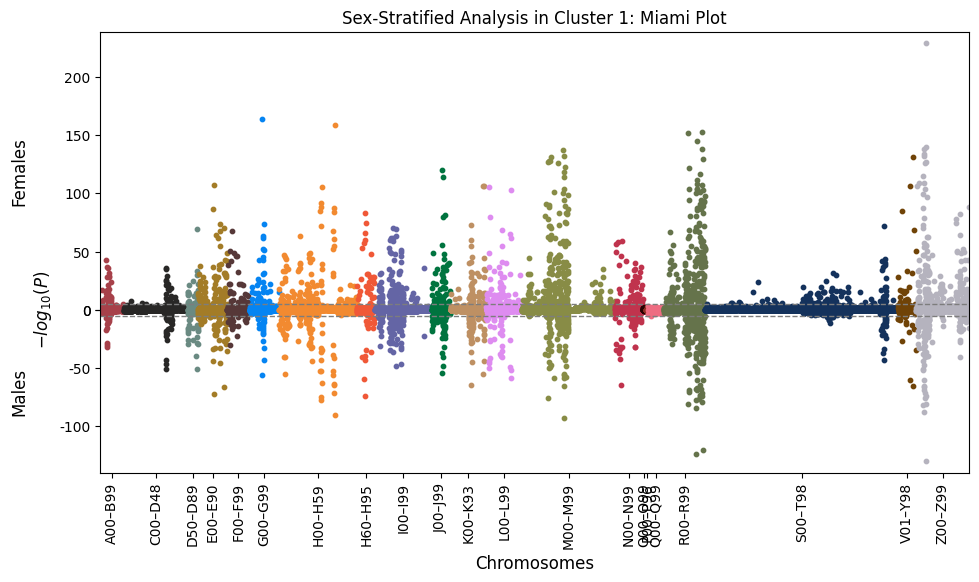

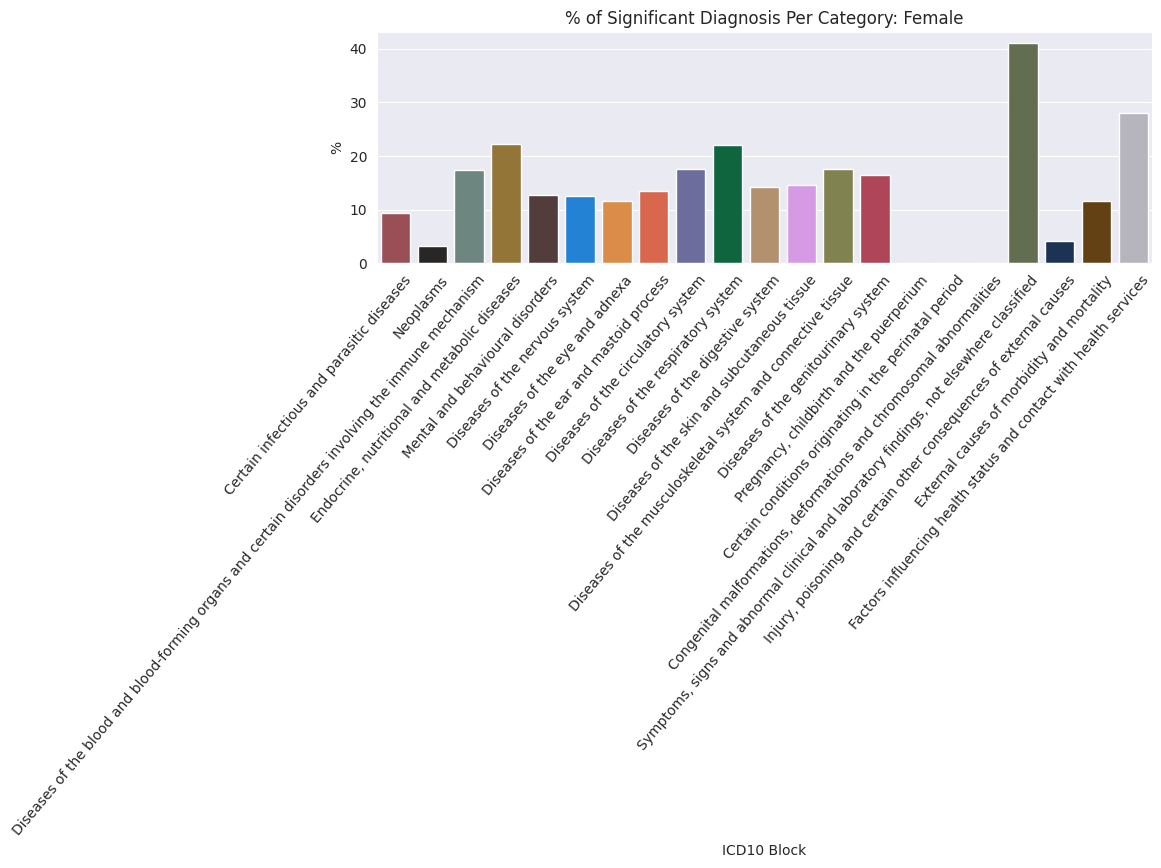

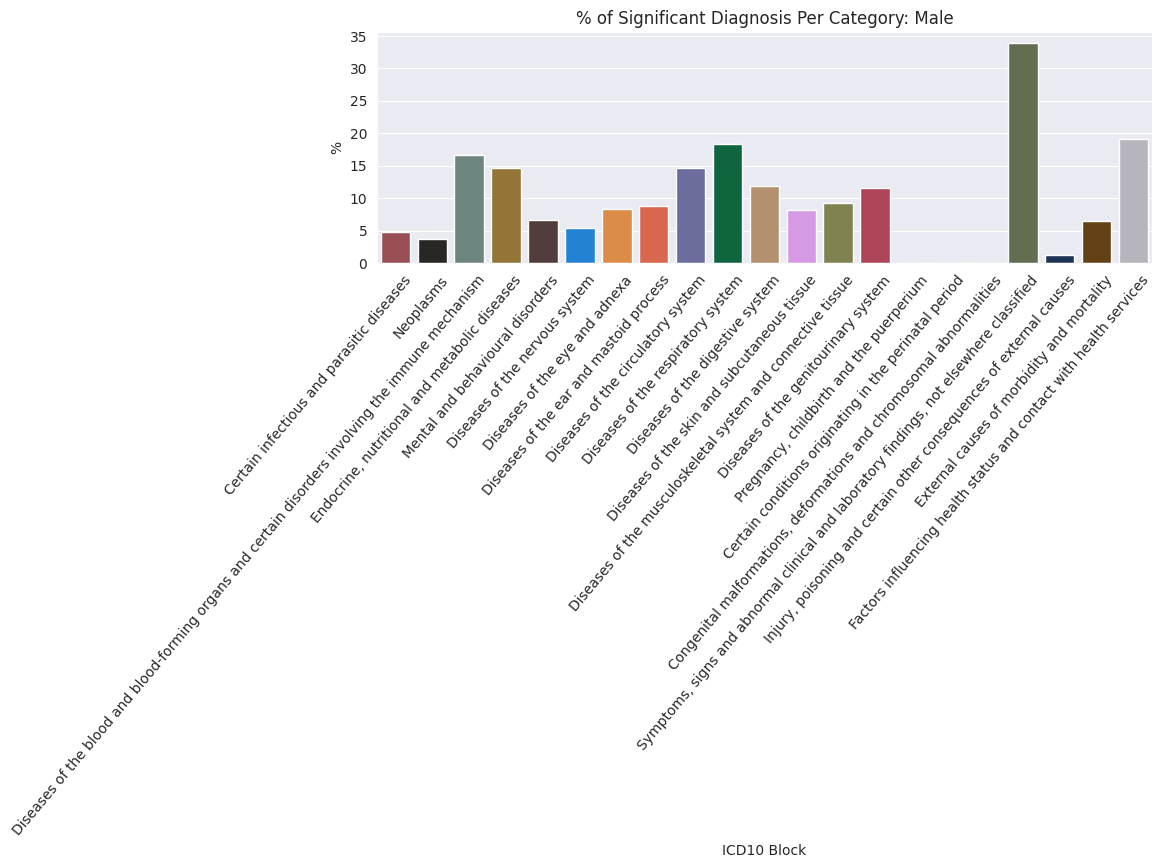

In [48]:
# percent significant in a category
icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

# ボンフェローニ補正閾値の設定
bc = .05 / cluster.shape[0]
chitest = cluster.explode('ICD10_chape').copy()
chitest['ICD10_chape'] = chitest['ICD10_chape'].apply(ICDchapter_to_name)

icd10dictF = list()
icd10dictM = list()

# 女性と男性のカテゴリごとの有意割合の計算
for value, g in chitest.groupby('ICD10_chape'):
    icd10dictF.append([value, ((g['pvalue_f'] < bc).sum()) * 100 / g.shape[0]])
    icd10dictM.append([value, ((g['pvalue_m'] < bc).sum()) * 100 / g.shape[0]])

# 女性の結果をプロット
icd10sigF = pd.DataFrame(icd10dictF).set_index(0)
icd10sigF = icd10sigF.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigF.index, y=icd10sigF[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Female')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)

# 男性の結果をプロット
icd10sigM = pd.DataFrame(icd10dictM).set_index(0)
icd10sigM = icd10sigM.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigM.index, y=icd10sigM[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Male')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)
    plt.show()

In [50]:
# 上位10件の行を取得
top_10_df_f = cluster.nlargest(10, '-log_pvalue_f')
top_10_df_m = cluster.nlargest(10, '-log_pvalue_m')

In [51]:
top_10_df_m

,index,ICD10,-log_pvalue_m,pvalue_m,OddsRatio_m,Cluster,-log_pvalue_f,pvalue_f,OddsRatio_f,ICD10_chape,ICD10_chape_name,ind
6969,6969,Z79.899,129.812303,1.540625e-130,41.277540,1,228.784392,1.642890e-229,34.022095,Z00–Z99,Factors influencing health status and contact ...,10052
7036,7036,R39.9,123.602545,2.497209e-124,43.920213,1,11.989848,1.023650e-12,13.900205,R00–R99,"Symptoms, signs and abnormal clinical and labo...",6920
7059,7059,R39.89,120.744566,1.800668e-121,48.962319,1,38.702999,1.981530e-39,25.405000,R00–R99,"Symptoms, signs and abnormal clinical and labo...",6894
6978,6978,M79.609,92.690684,2.038525e-93,24.357206,1,114.091343,8.103206e-115,15.322869,M00–M99,Diseases of the musculoskeletal system and con...,5998
7016,7016,H52.4,90.178682,6.627012e-91,24.511550,1,158.544174,2.856445e-159,22.012351,H00–H59,Diseases of the eye and adnexa,2242
6954,6954,Z23,87.956904,1.104323e-88,59.528678,1,131.970952,1.069172e-132,54.909390,Z00–Z99,Factors influencing health status and contact ...,10056
7034,7034,R73.09,84.629666,2.346031e-85,24.000180,1,100.132629,7.368370e-101,15.471159,R00–R99,"Symptoms, signs and abnormal clinical and labo...",6918
7095,7095,Z82.49,81.502217,3.146174e-82,32.492481,1,115.249159,5.634313e-116,28.170099,Z00–Z99,Factors influencing health status and contact ...,10063
6967,6967,Z71.89,81.140208,7.240898e-82,24.283311,1,140.194041,6.396741e-141,24.733560,Z00–Z99,Factors influencing health status and contact ...,10054
6964,6964,R94.31,81.121333,7.562526e-82,25.963983,1,152.147681,7.117368e-153,21.553199,R00–R99,"Symptoms, signs and abnormal clinical and labo...",6834


In [52]:
top_10_df = pd.concat([top_10_df_f, top_10_df_m])

In [53]:
top_10_df.to_csv('labels_miami_c1.csv', index=False)

In [54]:
icd10sigF[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified    41.020408
Factors influencing health status and contact with health services                         28.025478
Endocrine, nutritional and metabolic diseases                                              22.190202
Name: 1, dtype: float64

In [55]:
icd10sigM[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified    33.877551
Factors influencing health status and contact with health services                         19.108280
Diseases of the respiratory system                                                         18.385650
Name: 1, dtype: float64

# Cluster 2

In [56]:
cluster = data[data['Cluster']==2]

In [57]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
# Miami plots
dims = (10,5)
save = False
bc = .05/cluster.shape[0]
fig, ax = miami(df = cluster.explode('ICD10_chape'), logp1 = '-log_pvalue_f', 
                    logp2 = '-log_pvalue_m', chromo = 'ICD10_chape', 
                    dim = dims, yskip =50, gwas_sign_line=True, markernames=False, 
                    markeridcol='index', plotlabelrotation = 60, show = not save,
                    axlabelfontsize = 12, gfont = 6, dotsize = 10, axtickfontsize = 10, 
                    label1 = 'Females', label2 = 'Males', gwasp=bc, 
                    figtitle = "Sex-Stratified Analysis in Cluster 2: Miami Plot")

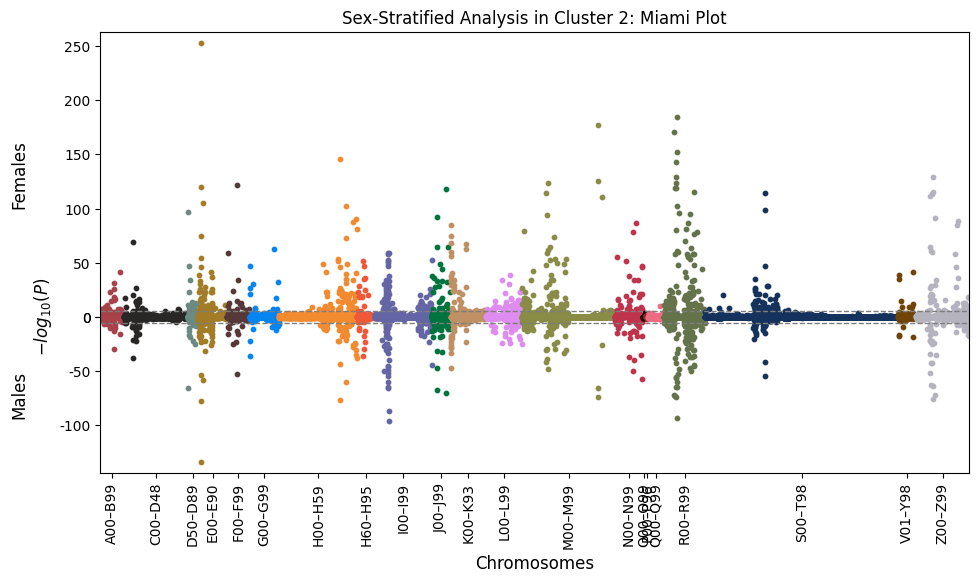

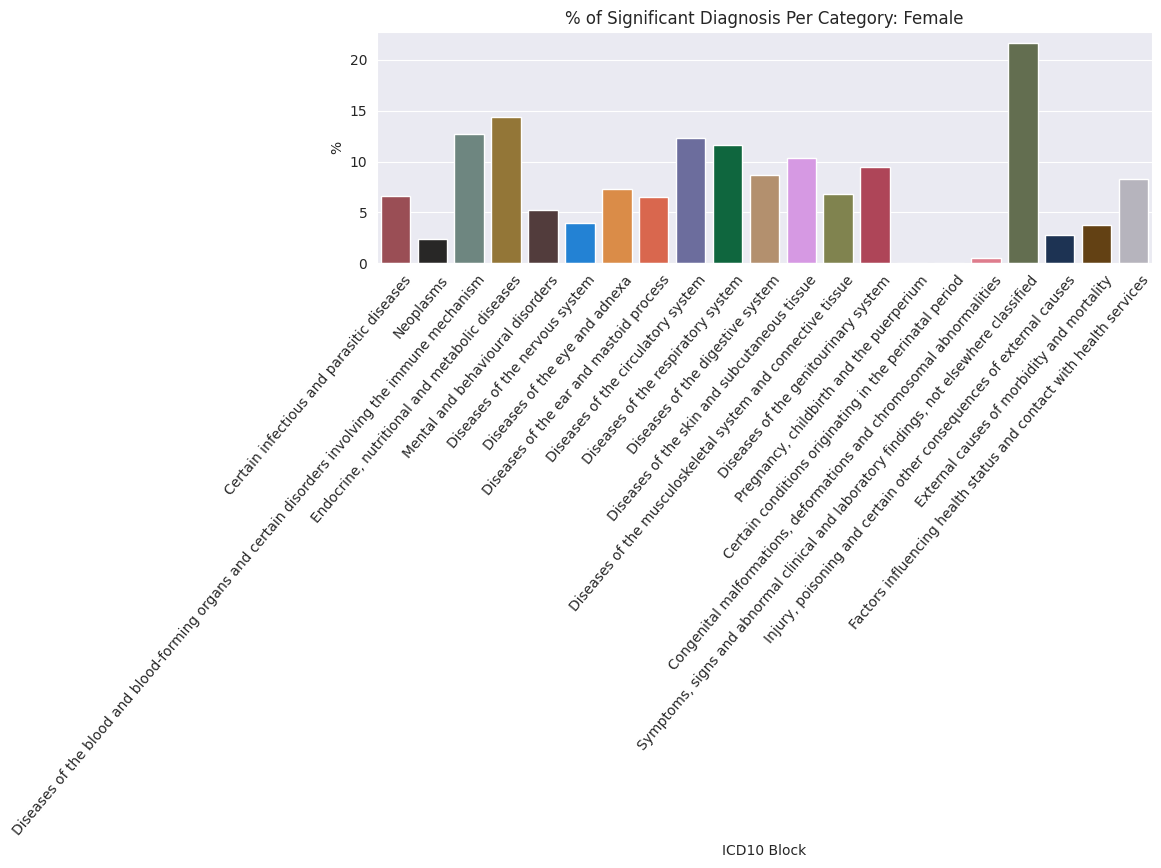

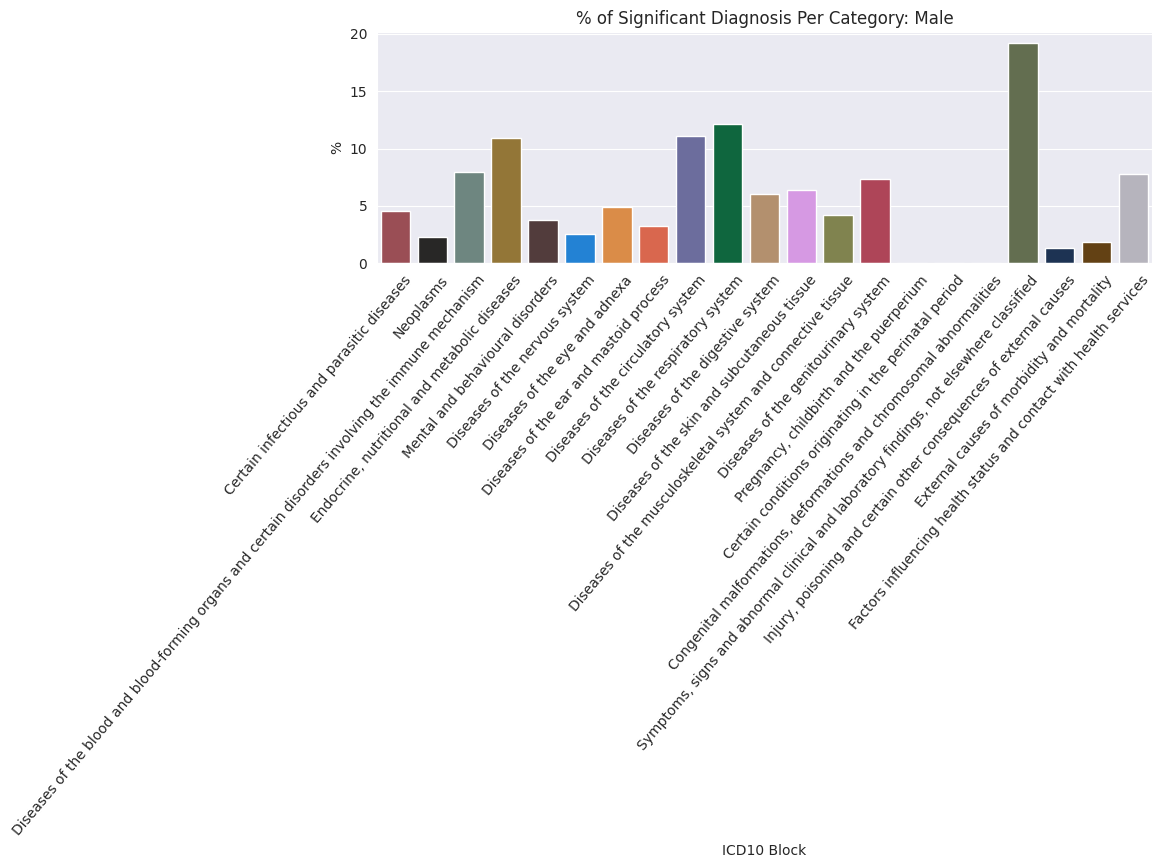

In [59]:
# percent significant in a category
icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

# ボンフェローニ補正閾値の設定
bc = .05 / cluster.shape[0]
chitest = cluster.explode('ICD10_chape').copy()
chitest['ICD10_chape'] = chitest['ICD10_chape'].apply(ICDchapter_to_name)

icd10dictF = list()
icd10dictM = list()

# 女性と男性のカテゴリごとの有意割合の計算
for value, g in chitest.groupby('ICD10_chape'):
    icd10dictF.append([value, ((g['pvalue_f'] < bc).sum()) * 100 / g.shape[0]])
    icd10dictM.append([value, ((g['pvalue_m'] < bc).sum()) * 100 / g.shape[0]])

# 女性の結果をプロット
icd10sigF = pd.DataFrame(icd10dictF).set_index(0)
icd10sigF = icd10sigF.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigF.index, y=icd10sigF[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Female')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)

# 男性の結果をプロット
icd10sigM = pd.DataFrame(icd10dictM).set_index(0)
icd10sigM = icd10sigM.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigM.index, y=icd10sigM[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Male')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)
    plt.show()

In [60]:
# 上位10件の行を取得
top_10_df_f = cluster.nlargest(10, '-log_pvalue_f')
top_10_df_m = cluster.nlargest(10, '-log_pvalue_m')

In [61]:
top_10_df_m

,index,ICD10,-log_pvalue_m,pvalue_m,OddsRatio_m,Cluster,-log_pvalue_f,pvalue_f,OddsRatio_f,ICD10_chape,ICD10_chape_name,ind
13923,13923,E78.2,133.808878,1.552824e-134,24.964193,2,253.270155,5.368403e-254,25.135893,E00–E90,"Endocrine, nutritional and metabolic diseases",1410
13956,13956,I25.89,96.581207,2.622968e-97,20.715728,2,37.657245,2.201683e-38,7.805066,I00–I99,Diseases of the circulatory system,3668
13907,13907,R07.9,93.795179,1.602586e-94,21.353558,2,184.844900,1.429224e-185,25.661728,R00–R99,"Symptoms, signs and abnormal clinical and labo...",7180
13958,13958,I20.9,87.035967,9.205202e-88,18.836040,2,58.873950,1.336748e-59,8.992075,I00–I99,Diseases of the circulatory system,3672
13911,13911,E78.00,77.750838,1.774851e-78,14.158824,2,119.710205,1.948924e-120,10.305176,E00–E90,"Endocrine, nutritional and metabolic diseases",1409
13942,13942,H25.10,76.613781,2.433432e-77,13.534591,2,145.952036,1.116771e-146,13.354320,H00–H59,Diseases of the eye and adnexa,2482
13913,13913,Z23,76.132880,7.364101e-77,13.623147,2,115.010975,9.750468e-116,11.057811,Z00–Z99,Factors influencing health status and contact ...,10312
13936,13936,M79.609,73.905914,1.241897e-74,12.592593,2,177.307605,4.924877e-178,15.888902,M00–M99,Diseases of the musculoskeletal system and con...,5550
13920,13920,R09.89,73.806903,1.559900e-74,12.090387,2,119.455311,3.505008e-120,10.049054,R00–R99,"Symptoms, signs and abnormal clinical and labo...",7161
13915,13915,R05,73.323080,4.752477e-74,12.734766,2,119.428095,3.731684e-120,10.688419,R00–R99,"Symptoms, signs and abnormal clinical and labo...",7174


In [62]:
top_10_df = pd.concat([top_10_df_f, top_10_df_m])

In [63]:
top_10_df.to_csv('labels_miami_c2.csv', index=False)

In [64]:
icd10sigF[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified                21.632653
Endocrine, nutritional and metabolic diseases                                                          14.409222
Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism    12.698413
Name: 1, dtype: float64

In [65]:
icd10sigM[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified    19.183673
Diseases of the respiratory system                                                         12.107623
Diseases of the circulatory system                                                         11.111111
Name: 1, dtype: float64

# Cluster 3

In [66]:
cluster = data[data['Cluster']==3]

In [67]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
# Miami plots
dims = (10,5)
save = False
bc = .05/cluster.shape[0]
fig, ax = miami(df = cluster.explode('ICD10_chape'), logp1 = '-log_pvalue_f', 
                    logp2 = '-log_pvalue_m', chromo = 'ICD10_chape', 
                    dim = dims, yskip =50, gwas_sign_line=True, markernames=False, 
                    markeridcol='index', plotlabelrotation = 60, show = not save,
                    axlabelfontsize = 12, gfont = 6, dotsize = 10, axtickfontsize = 10, 
                    label1 = 'Females', label2 = 'Males', gwasp=bc, 
                    figtitle = "Sex-Stratified Analysis in Cluster 3: Miami Plot")

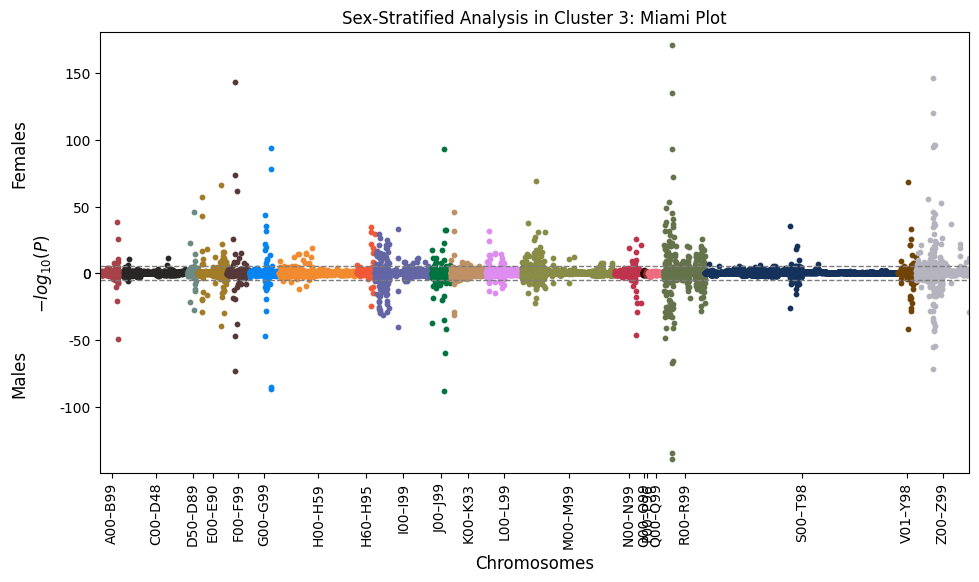

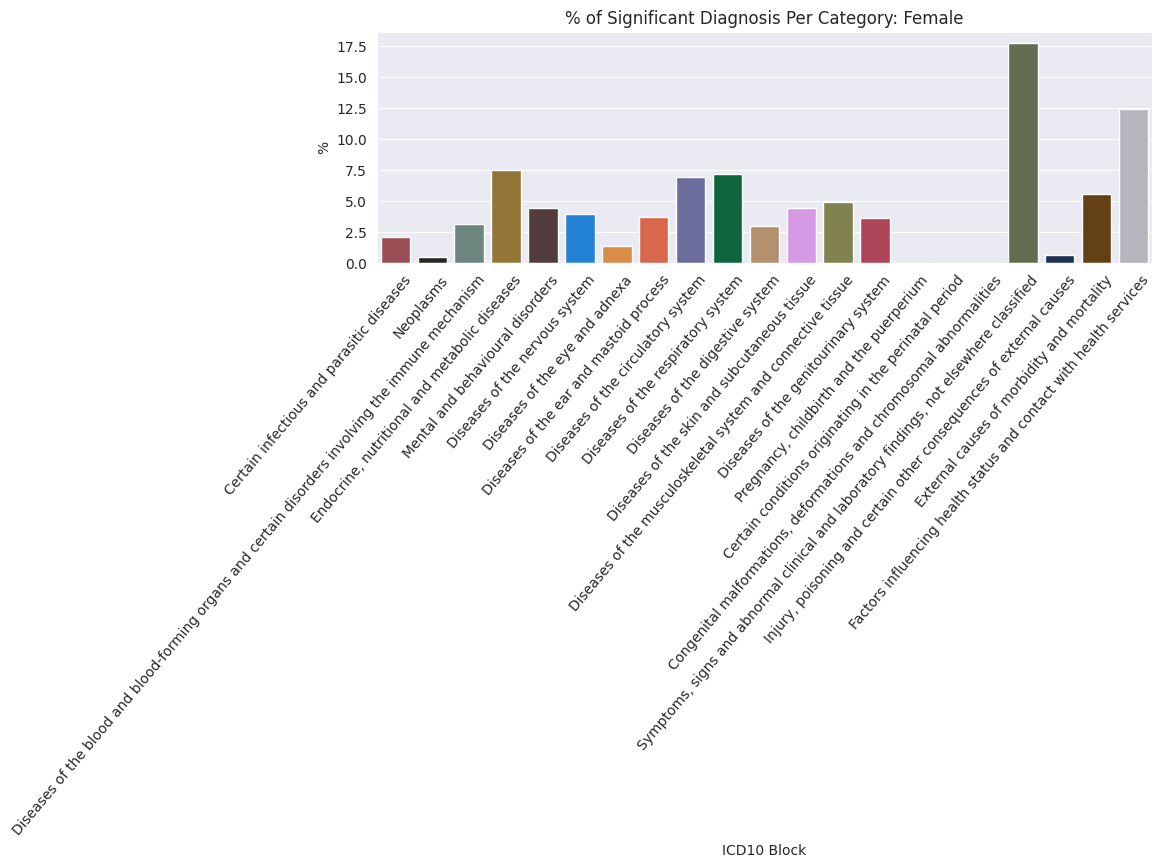

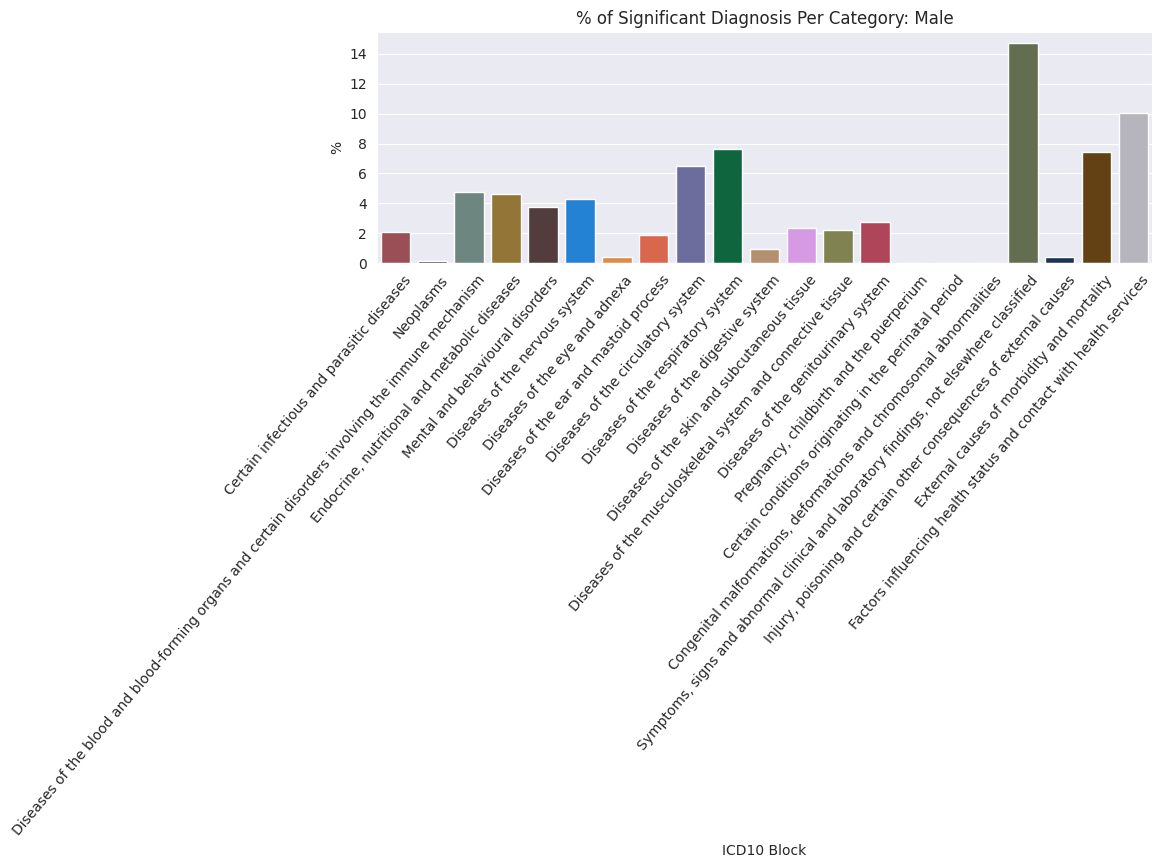

In [69]:
# percent significant in a category
icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

# ボンフェローニ補正閾値の設定
bc = .05 / cluster.shape[0]
chitest = cluster.explode('ICD10_chape').copy()
chitest['ICD10_chape'] = chitest['ICD10_chape'].apply(ICDchapter_to_name)

icd10dictF = list()
icd10dictM = list()

# 女性と男性のカテゴリごとの有意割合の計算
for value, g in chitest.groupby('ICD10_chape'):
    icd10dictF.append([value, ((g['pvalue_f'] < bc).sum()) * 100 / g.shape[0]])
    icd10dictM.append([value, ((g['pvalue_m'] < bc).sum()) * 100 / g.shape[0]])

# 女性の結果をプロット
icd10sigF = pd.DataFrame(icd10dictF).set_index(0)
icd10sigF = icd10sigF.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigF.index, y=icd10sigF[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Female')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)

# 男性の結果をプロット
icd10sigM = pd.DataFrame(icd10dictM).set_index(0)
icd10sigM = icd10sigM.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigM.index, y=icd10sigM[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Male')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)
    plt.show()

In [71]:
# 上位10件の行を取得
top_10_df_f = cluster.nlargest(10, '-log_pvalue_f')
top_10_df_m = cluster.nlargest(10, '-log_pvalue_m')

In [72]:
top_10_df_m

,index,ICD10,-log_pvalue_m,pvalue_m,OddsRatio_m,Cluster,-log_pvalue_f,pvalue_f,OddsRatio_f,ICD10_chape,ICD10_chape_name,ind
20864,20864,R91.8,139.449256,3.554218e-140,17.236326,3,171.153696,7.019465e-172,11.802934,R00–R99,"Symptoms, signs and abnormal clinical and labo...",7015
20863,20863,R94.31,134.854052,1.399419e-135,16.346678,3,135.081338,8.292044e-136,9.184307,R00–R99,"Symptoms, signs and abnormal clinical and labo...",7019
20901,20901,J98.11,88.561741,2.743209e-89,18.503670,3,93.489475,3.239854e-94,11.806761,J00–J99,Diseases of the respiratory system,3978
20905,20905,G93.41,87.036817,9.187192e-88,19.455874,3,78.539908,2.884639e-79,11.086817,G00–G99,Diseases of the nervous system,1814
20884,20884,G93.40,84.946431,1.131277e-85,13.062887,3,93.779292,1.662293e-94,9.694412,G00–G99,Diseases of the nervous system,1815
20859,20859,F02.80,73.207835,6.196759e-74,13.118055,3,143.347620,4.491378e-144,15.354128,F00–F99,Mental and behavioural disorders,1779
20869,20869,Z71.89,71.940181,1.147675e-72,8.307671,3,146.165831,6.826039e-147,9.443249,Z00–Z99,Factors influencing health status and contact ...,10334
20881,20881,R41.0,66.903166,1.249781e-67,9.212416,3,93.074677,8.420212e-94,7.933531,R00–R99,"Symptoms, signs and abnormal clinical and labo...",7018
20865,20865,R41.82,65.856540,1.391426e-66,7.351897,3,72.559183,2.759418e-73,5.175345,R00–R99,"Symptoms, signs and abnormal clinical and labo...",7012
20888,20888,J90,59.437406,3.652534e-60,8.482989,3,32.565034,2.722486e-33,4.004047,J00–J99,Diseases of the respiratory system,3968


In [73]:
top_10_df = pd.concat([top_10_df_f, top_10_df_m])

In [74]:
top_10_df.to_csv('labels_miami_c3.csv', index=False)

In [75]:
icd10sigF[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified    17.755102
Factors influencing health status and contact with health services                         12.420382
Endocrine, nutritional and metabolic diseases                                               7.492795
Name: 1, dtype: float64

In [76]:
icd10sigM[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified    14.693878
Factors influencing health status and contact with health services                         10.031847
Diseases of the respiratory system                                                          7.623318
Name: 1, dtype: float64

# Cluster 4

In [77]:
cluster = data[data['Cluster']==4]

In [78]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
cluster

,index,ICD10,-log_pvalue_m,pvalue_m,OddsRatio_m,Cluster,-log_pvalue_f,pvalue_f,OddsRatio_f,ICD10_chape,ICD10_chape_name,ind
32146,32146,B85.4,-0.0,1.0,0.0,4,0.436475,0.366037,3.910351,A00–B99,Certain infectious and parasitic diseases,0
32180,32180,B37.42,-0.0,1.0,0.0,4,NaN,NaN,NaN,A00–B99,Certain infectious and parasitic diseases,1
49907,49907,A52.9,NaN,NaN,NaN,4,-0.000000,1.000000,0.000000,A00–B99,Certain infectious and parasitic diseases,2
49911,49911,B00.51,NaN,NaN,NaN,4,-0.000000,1.000000,0.000000,A00–B99,Certain infectious and parasitic diseases,3
49925,49925,B37.41,NaN,NaN,NaN,4,-0.000000,1.000000,0.000000,A00–B99,Certain infectious and parasitic diseases,4
...,...,...,...,...,...,...,...,...,...,...,...,...
48374,48374,Z12.39,NaN,NaN,NaN,4,1.090018,0.081280,0.748442,Z00–Z99,Factors influencing health status and contact ...,10348
32555,32555,Z12.82,-0.0,1.0,0.0,4,NaN,NaN,NaN,Z00–Z99,Factors influencing health status and contact ...,10349
32515,32515,Z96.619,-0.0,1.0,0.0,4,0.447162,0.357139,0.000000,Z00–Z99,Factors influencing health status and contact ...,10350
32509,32509,Z19.2,-0.0,1.0,0.0,4,NaN,NaN,NaN,Z00–Z99,Factors influencing health status and contact ...,10351


In [80]:
# Miami plots
dims = (10,5)
save = False
bc = .05/cluster.shape[0]
fig, ax = miami(df = cluster.explode('ICD10_chape'), logp1 = '-log_pvalue_f', 
                    logp2 = '-log_pvalue_m', chromo = 'ICD10_chape', 
                    dim = dims, yskip =50, gwas_sign_line=True, markernames=False, 
                    markeridcol='index', plotlabelrotation = 60, show = not save,
                    axlabelfontsize = 12, gfont = 6, dotsize = 10, axtickfontsize = 10, 
                    label1 = 'Females', label2 = 'Males', gwasp=bc, 
                    figtitle = "Sex-Stratified Analysis in Cluster 4: Miami Plot")

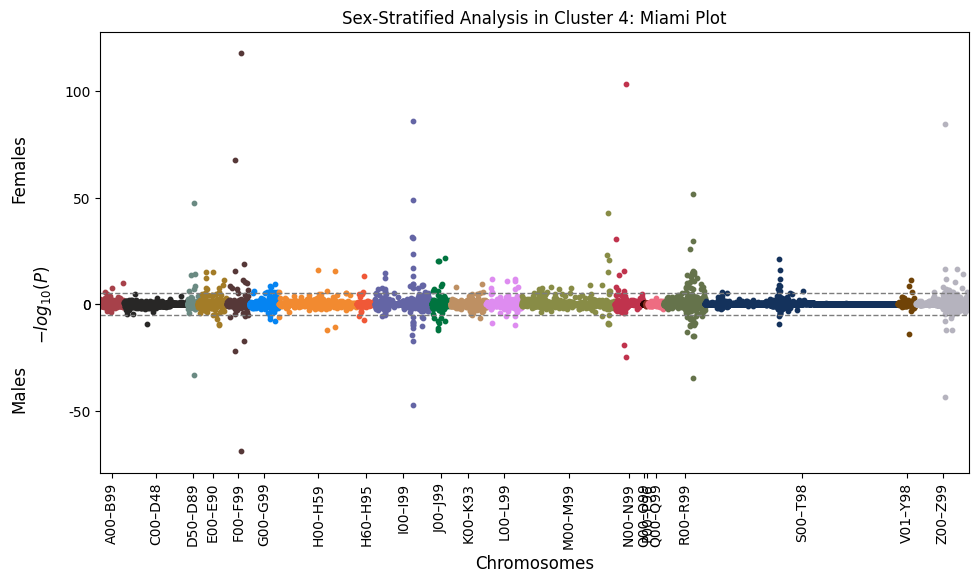

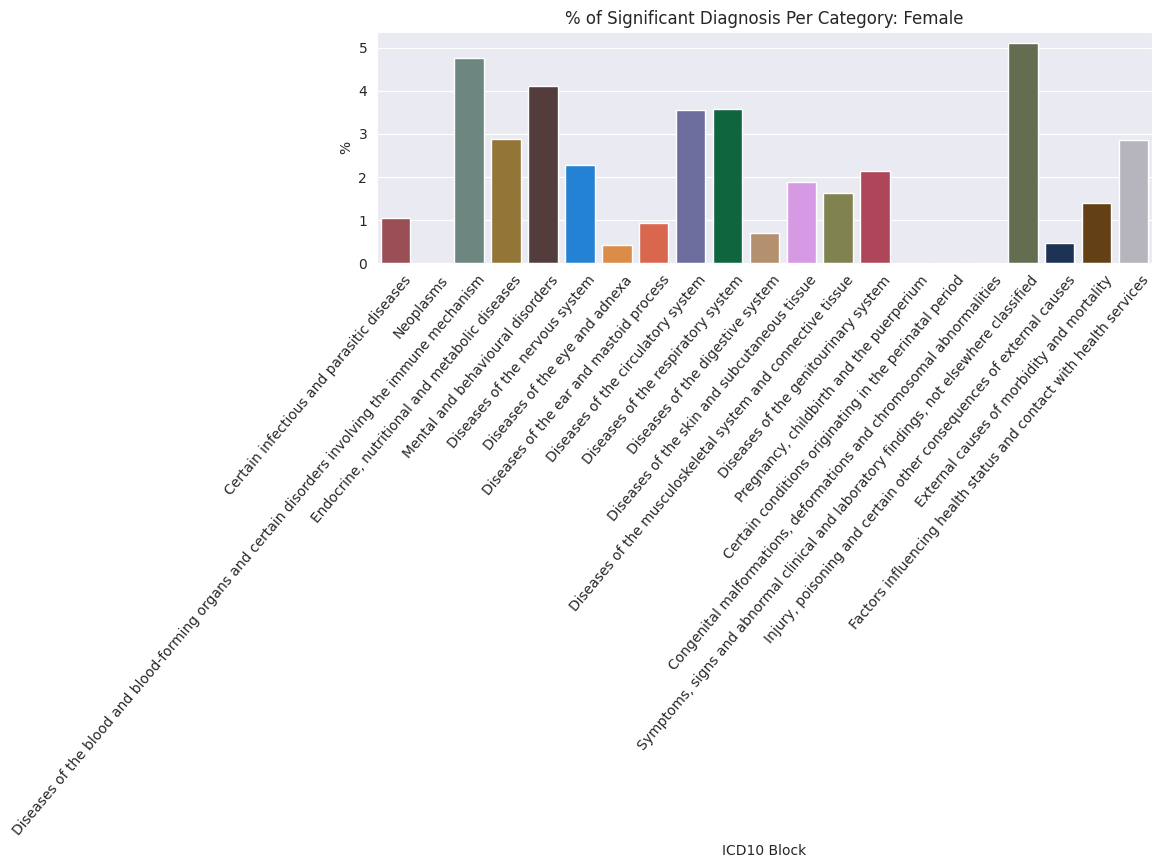

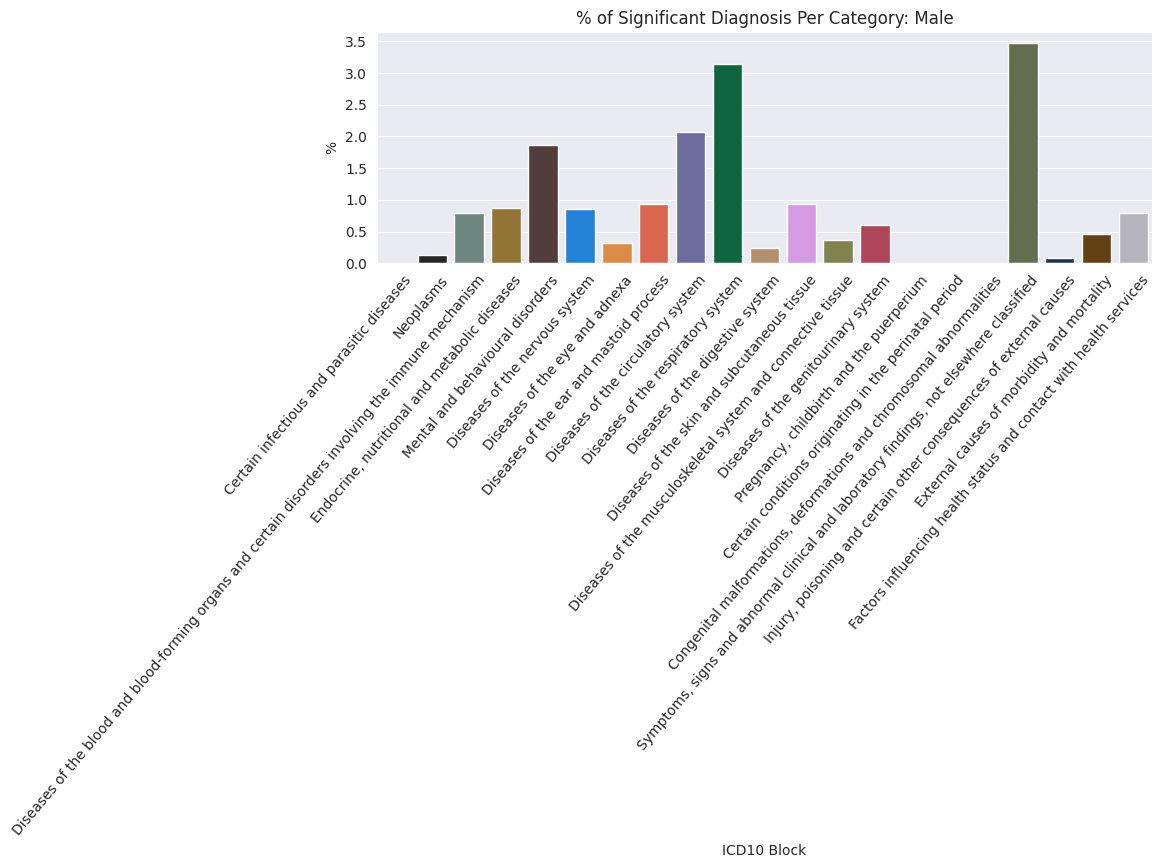

In [81]:
# percent significant in a category
icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

# ボンフェローニ補正閾値の設定
bc = .05 / cluster.shape[0]
chitest = cluster.explode('ICD10_chape').copy()
chitest['ICD10_chape'] = chitest['ICD10_chape'].apply(ICDchapter_to_name)

icd10dictF = list()
icd10dictM = list()

# 女性と男性のカテゴリごとの有意割合の計算
for value, g in chitest.groupby('ICD10_chape'):
    icd10dictF.append([value, ((g['pvalue_f'] < bc).sum()) * 100 / g.shape[0]])
    icd10dictM.append([value, ((g['pvalue_m'] < bc).sum()) * 100 / g.shape[0]])

# 女性の結果をプロット
icd10sigF = pd.DataFrame(icd10dictF).set_index(0)
icd10sigF = icd10sigF.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigF.index, y=icd10sigF[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Female')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)

# 男性の結果をプロット
icd10sigM = pd.DataFrame(icd10dictM).set_index(0)
icd10sigM = icd10sigM.reindex(icd10order)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10, 3))
    sns.barplot(x=icd10sigM.index, y=icd10sigM[1].values, palette=rand_colors)
    plt.xticks(rotation=50, va='top', ha='right')
    plt.ylabel('%')
    plt.title('% of Significant Diagnosis Per Category: Male')
    plt.xlabel('ICD10 Block')
    plt.xticks(np.arange(len(icd10order)) + .5, icd10order)
    plt.show()

In [82]:
# 上位10件の行を取得
top_10_df_f = cluster.nlargest(10, '-log_pvalue_f')
top_10_df_m = cluster.nlargest(10, '-log_pvalue_m')

In [83]:
top_10_df_m

,index,ICD10,-log_pvalue_m,pvalue_m,OddsRatio_m,Cluster,-log_pvalue_f,pvalue_f,OddsRatio_f,ICD10_chape,ICD10_chape_name,ind
27814,27814,F06.8,69.052031,8.870927e-70,6.292147,4,117.758568,1.743539e-118,5.338220,F00–F99,Mental and behavioural disorders,1545
27812,27812,I10,47.517667,3.036220e-48,6.426231,4,85.759032,1.741678e-86,4.988138,I00–I99,Diseases of the circulatory system,3284
27813,27813,Z78.9,43.686762,2.057018e-44,4.206835,4,84.629038,2.349426e-85,3.819222,Z00–Z99,Factors influencing health status and contact ...,9816
27817,27817,R07.9,34.859528,1.381884e-35,3.727154,4,51.455233,3.505639e-52,2.980279,R00–R99,"Symptoms, signs and abnormal clinical and labo...",6763
27816,27816,D64.9,33.398267,3.996993e-34,3.576669,4,47.451079,3.539331e-48,2.815226,D50–D89,Diseases of the blood and blood-forming organs...,1051
27819,27819,N39.0,24.732619,1.850891e-25,3.125811,4,103.153577,7.021389e-104,4.402024,N00–N99,Diseases of the genitourinary system,6397
27860,27860,F02.80,22.226704,5.933294e-23,0.281599,4,67.514670,3.057241e-68,0.208127,F00–F99,Mental and behavioural disorders,1776
27844,27844,N28.9,19.393225,4.043662e-20,3.346229,4,15.747444,1.788776e-16,2.495021,N00–N99,Diseases of the genitourinary system,6459
27832,27832,I50.9,17.464958,3.428007e-18,2.859563,4,48.967736,1.077120e-49,3.315337,I00–I99,Diseases of the circulatory system,3281
27868,27868,F29,17.188147,6.484156e-18,3.893438,4,18.827489,1.487684e-19,2.867138,F00–F99,Mental and behavioural disorders,1581


In [84]:
top_10_df = pd.concat([top_10_df_f, top_10_df_m])

In [85]:
top_10_df.to_csv('labels_miami_c4.csv', index=False)

In [86]:
icd10sigF[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified                5.102041
Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism    4.761905
Mental and behavioural disorders                                                                       4.119850
Name: 1, dtype: float64

In [87]:
icd10sigM[1].nlargest(3)

0
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified    3.469388
Diseases of the respiratory system                                                         3.139013
Diseases of the circulatory system                                                         2.074074
Name: 1, dtype: float64